### Origin of the Research:
I am a rock music enthusiast, particularly fond of the Chinese rock band "Omnipotent Youth Society". Their songs incorporate elements of Hebei's industrial industry, reflecting the structural challenges in the region's development. When they express their hidden grievances about injustice, I couldn't help but wonder about exploring the related issues. I began to wonder about the generation and utilization of (industrial) waste in different regions of China. Are there significant regional differences in this regard?

### Completed Content:
Investigating the Regional Utilization of (Industrial) Waste: For any given year, calculate the utilization rate of general industrial solid waste using two indicators, "General Industrial Solid Waste Generation" and "Comprehensive Utilization of General Industrial Solid Waste." Present the utilization rates across different regions using a scatter plot.

Exploring the Distribution of Regions with Similar (Industrial) Waste Generation: For any given year, utilize two clustering methods, hierarchical clustering and K-means clustering. Categorize various regions based on their waste generation levels and illustrate the region categories using a dendrogram and scatter plot.

### Basic Approach:
Input: 1. Relative path to the data file; 2. Call the function with the input year parameter.<br>
Output: 1. Analysis of utilization rates: Output scatter plots for various regions; 2. Analysis of regional similarity in waste generation: Output dendrograms and scatter plots. Additionally, you can adjust the number of clusters for K-means clustering based on the dendrogram results to achieve more effective analysis.

### Data Discription:
Cross-sectional data from the China Statistical Yearbook for the years 2016, 2018, and 2020.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq, kmeans, whiten

In [3]:
# Import data
# 'Giswg' refers to "General Industrial Solid Waste Generation"
# 'Cufgisw' refers to "Comprehensive Utilization of General Industrial Solid Waste"
# 'Hwp' stands for "Hazardous Waste Production"
def getData(path):
    file_sum= pd.read_csv(path)
    file_sum = file_sum.dropna(axis=0, how='all')
    df_sum = pd.DataFrame(file_sum)
   # Separate the three-year cross-sectional data and store it using dictionary type
    df = {}
    for i in range(3):
        df[2016+2*(2-i)] = df_sum.iloc[i*32:i*32+31, :]
    # Check if our split is correct --> if correct, the first "Cities" for each should be "Beijing"
    if [df[2016 + 2*i]["Cities"][(2-i)*32] for i in range(3)] != ["Beijing", "Beijing", "Beijing"]:
        print("Split ERROR")
        exit(1)
    print("Data read and correctly split")
    for i in df:    
        # Perform forced type conversion for the variables
        df[i] = df[i].astype({"Cities":'str',"Giswg":'float',"Cufgisw":'float',"Hwp":'float'})
        # Set index
        df[i] = df[i].set_index('Cities')
    return df

In [4]:
# Draw visualizations
def showFigure(year, df):
    N = len(df)

    np.random.seed(42)
    plt.rcParams['savefig.dpi'] = 300 # Image pixel
    plt.rcParams['figure.dpi'] = 300 # Resolution
    plt.rcParams['figure.figsize'] = (9.0, 7.0) # Set figure_size dimensions

    x = np.array(df["use_ratio"])
    y = np.array(df.index)
    colors = np.random.rand(N)
    area = np.pi * (15 * np.e**-x)**2  # Define the area for each circle: the radius is e^-x, meaning the larger the use ratio, the smaller the area

    fig, ax = plt.subplots()

    ax.scatter(x, y, s=area, c=colors, alpha=0.5)
    ax.annotate(
        "The larger the use_ratio, the smaller the circle area", xy=(x[0], y[0]), xycoords="data",
        xytext=(0.5, 0.8),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6")
    )
    plt.title(f"use_ratio for {year}")
    fig.savefig(f"{year}'s use_ratio scatter plot.png")

In [5]:
def showRatio(year, df):
   # Create a new column to calculate the utilization rate of general industrial solid waste
    df['use_ratio'] = df['Cufgisw'] / df["Giswg"] 
    print(i)
    print(df.head(),end="\n\n")
    showFigure(i, df)

In [6]:
def figureHelper(x,y,year):
    N = len(x)
    colors = np.random.rand(N)
    fig, ax = plt.subplots()
    plt.title(f"Cluster for {year}")
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 0.5, 1, 1]))
    ax.scatter(x, y, c=colors, alpha=0.5)
    fig.savefig(f"{year}Cluster.png")

In [7]:
def showCluster(year, df):
    df = df.dropna(axis = 0, subset = ['Giswg', 'Hwp'])
    # Generate a distance matrix between points, using Euclidean distance here: euclidean
    disMat = sch.distance.pdist(X=df[['Giswg', 'Hwp']], metric='euclidean')
    Z = sch.linkage(disMat,method='ward')
    
    fig,ax = plt.subplots(1, 1, figsize=(35, 10))  # figsize is the size of the canvas
    P = sch.dendrogram(Z, labels=df.index.tolist(), above_threshold_color='C0')
   # Represent the results of hierarchical clustering as a dendrogram
    plt.plot(linewidth=1.0)
    plt.xticks(fontsize=14, rotation=0)  # Adjust x-axis label font size and orientation
    plt.rcParams['savefig.dpi'] = 300  # Picture pixel
    plt.rcParams['figure.dpi'] = 200  # Resolution
    plt.tight_layout() # Automatically adjust subplot parameters to fill the entire image area
    plt.title(f"{year}Cluster Result")
    fig.savefig(f"{year}'s Cluster Result.png")
    # Proceed with k-means clustering
    # Normalize the original data
    data=whiten(df)
    # Use the kmeans function for clustering, inputting the data as the first dimension and the number of clusters k as the second dimension
    # We input the number of clusters directly based on the previous hierarchical analysis
    # The output of k-means is actually two-dimensional; the first dimension is the cluster centers, and the second is the distortion loss. We only take the first dimension here, so there's a [0] at the end
    centroid=kmeans(data,3)[0] 
    # Use the vq function to classify all data based on cluster centers, the output of vq is also two-dimensional; [0] represents the label of all data
    label=vq(data,centroid)[0] 
    
    x = np.array(label)
    y = np.array(df.index)
    
    figureHelper(x,y,year)

Data read and correctly split
2020
             Giswg  Cufgisw     Hwp  use_ratio
Cities                                        
Beijing      415.0    193.0   24.97   0.465060
Tianjing    1739.0   1731.0   63.70   0.995400
Hebei      34081.0  18880.0  357.46   0.553974
Shanxi     42635.0  17150.0  213.98   0.402252
Neimenggu  35117.0  12377.0  540.58   0.352450

Conducting clustering analysis for the year2020
Clustering analysis for the year 2020concluded
2018
             Giswg  Cufgisw     Hwp  use_ratio
Cities                                        
Beijing      702.0    499.0   18.55   0.710826
Tianjing    1602.0   1553.0   41.50   0.969413
Hebei      33981.0  17690.0  196.76   0.520585
Shanxi     43479.0  16281.0  165.73   0.374457
Neimenggu  34841.0   9357.0  329.36   0.268563

Conducting clustering analysis for the year2018
Clustering analysis for the year 2018concluded
2016
             Giswg  Cufgisw     Hwp  use_ratio
Cities                                        
Beijing    

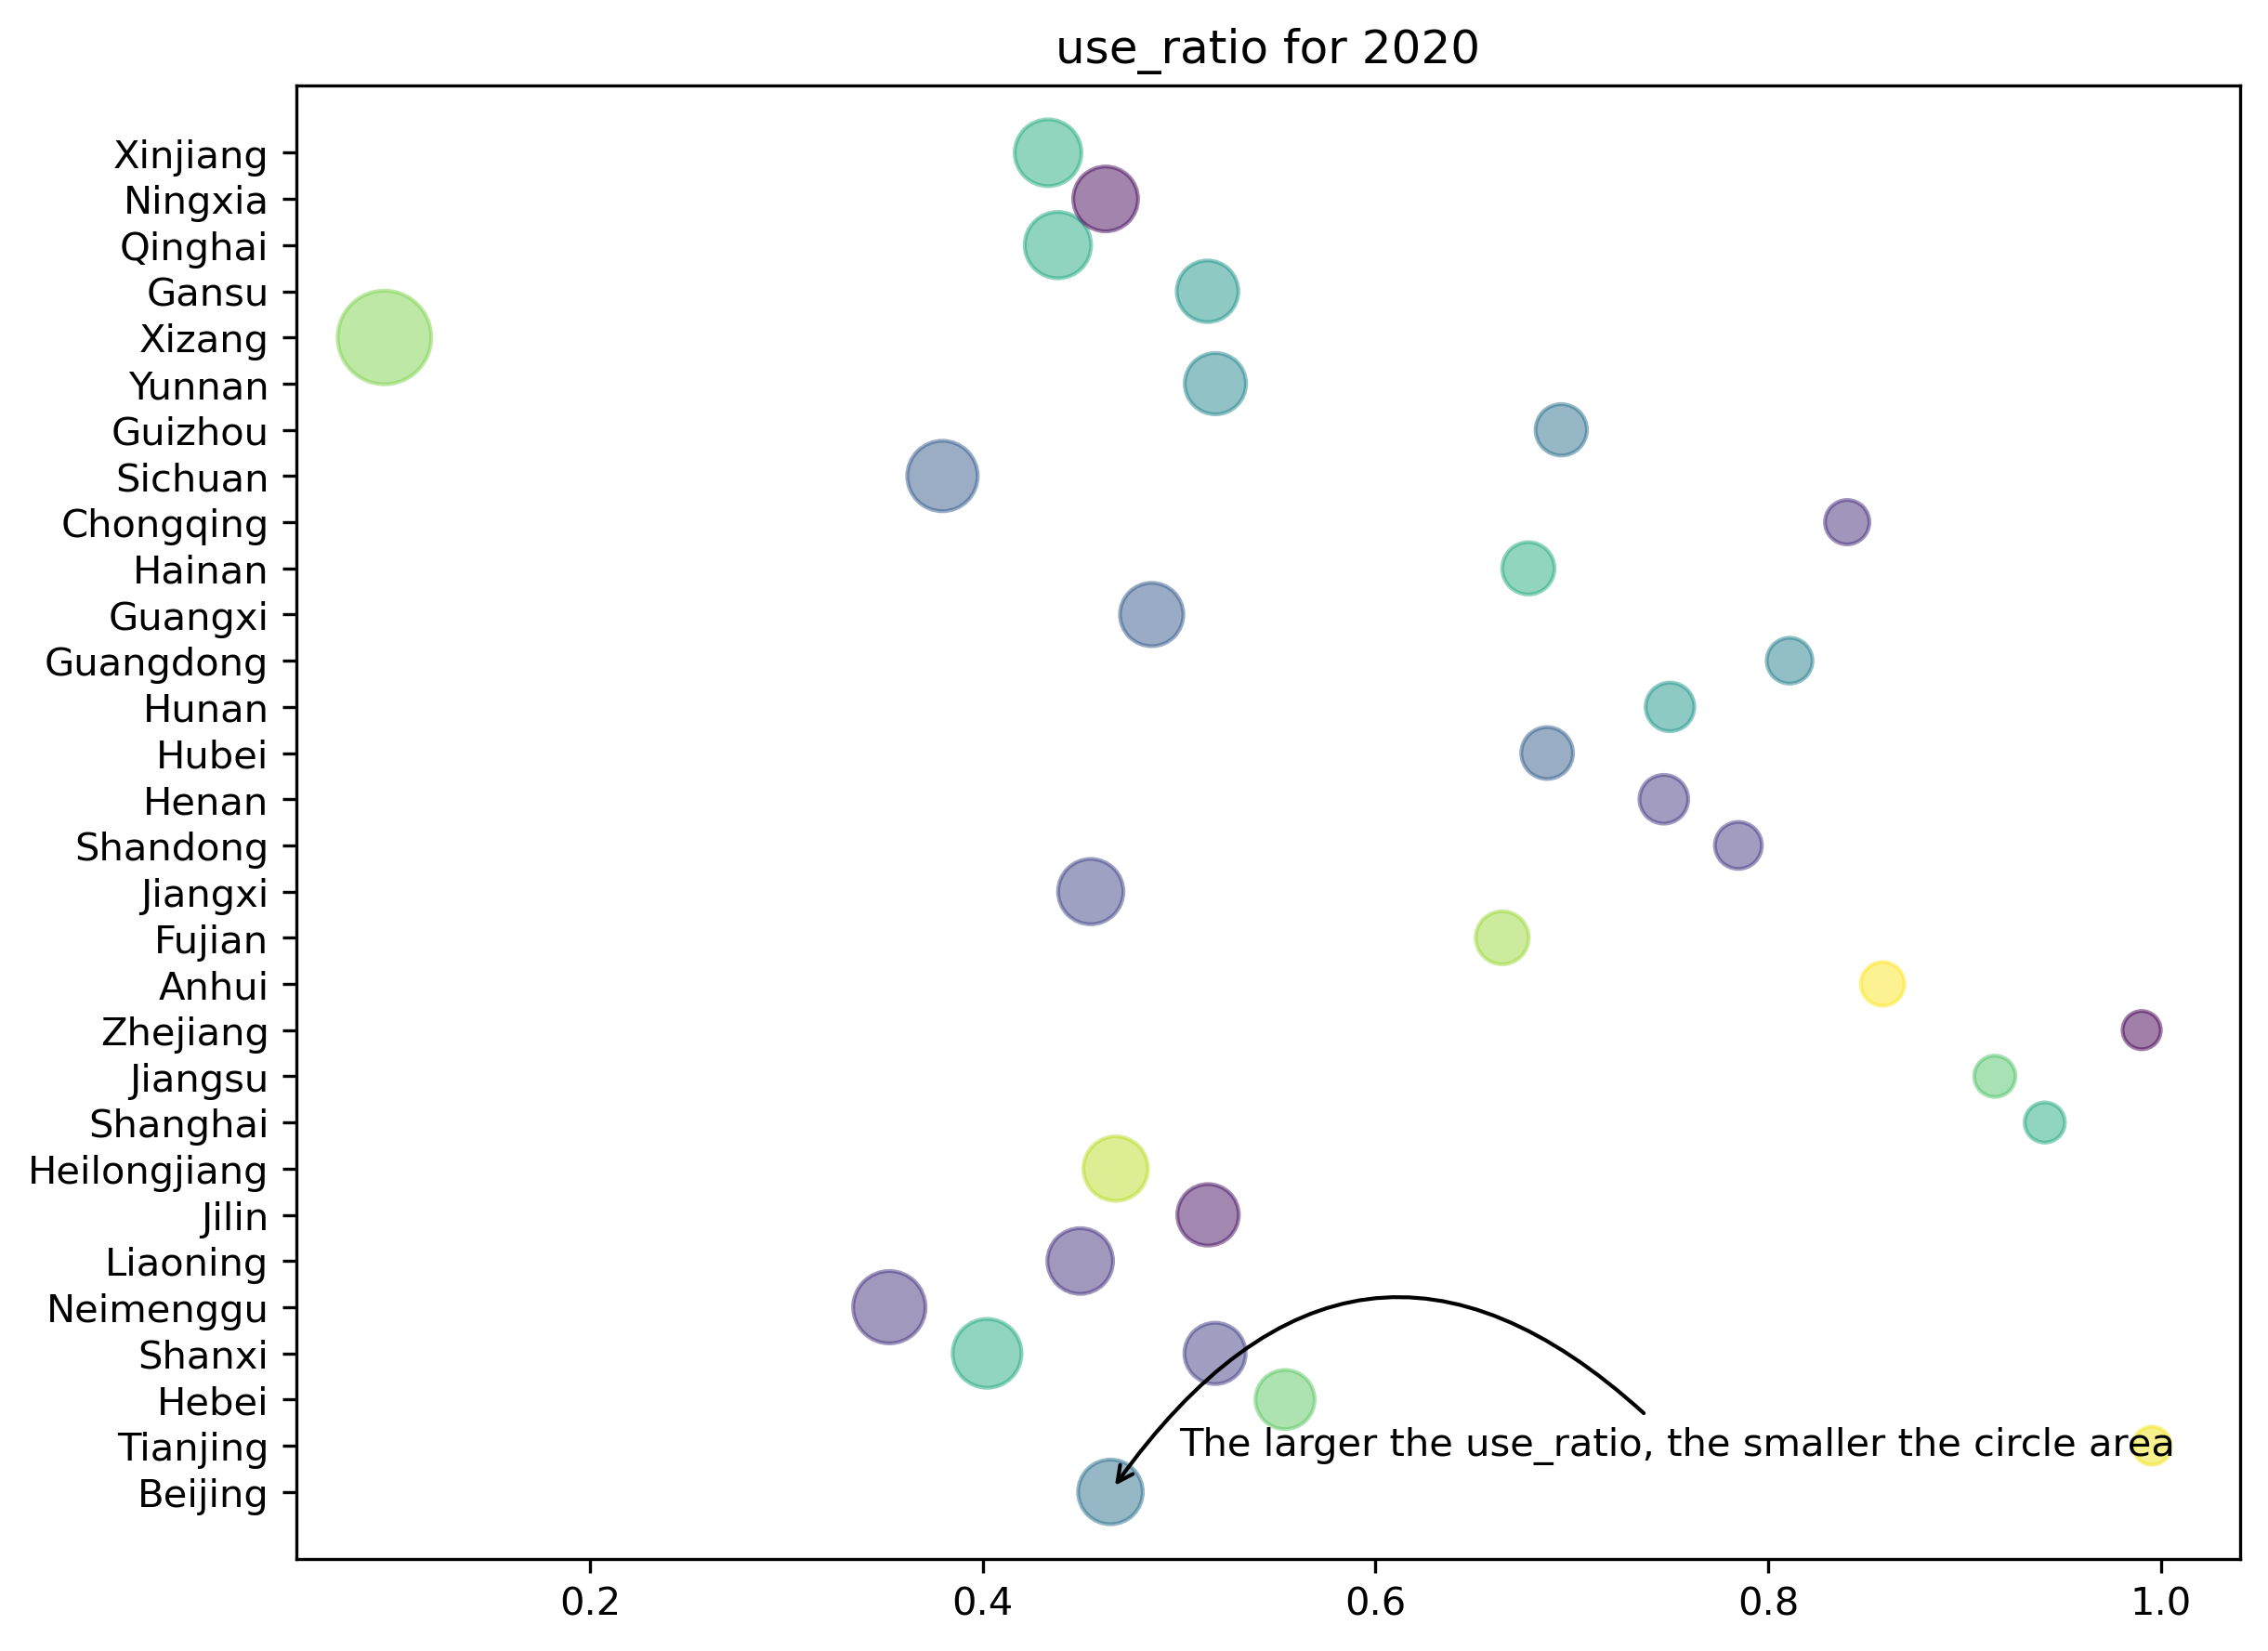

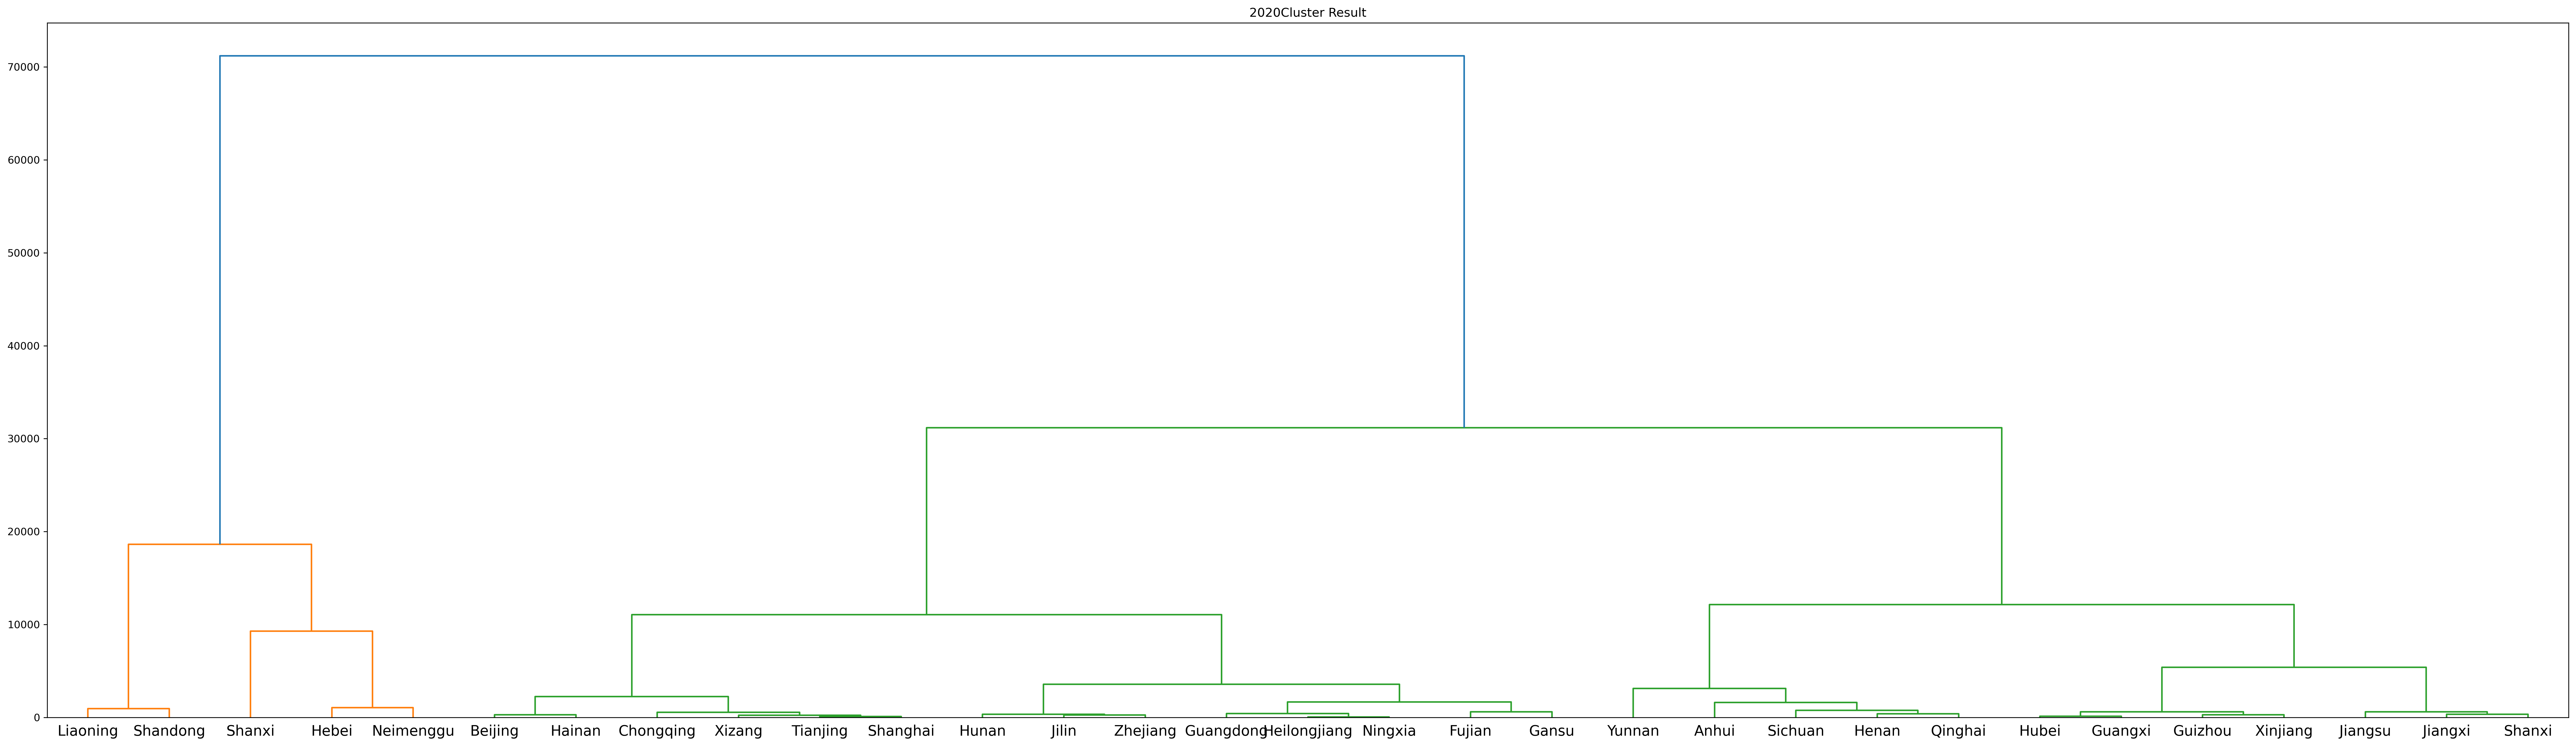

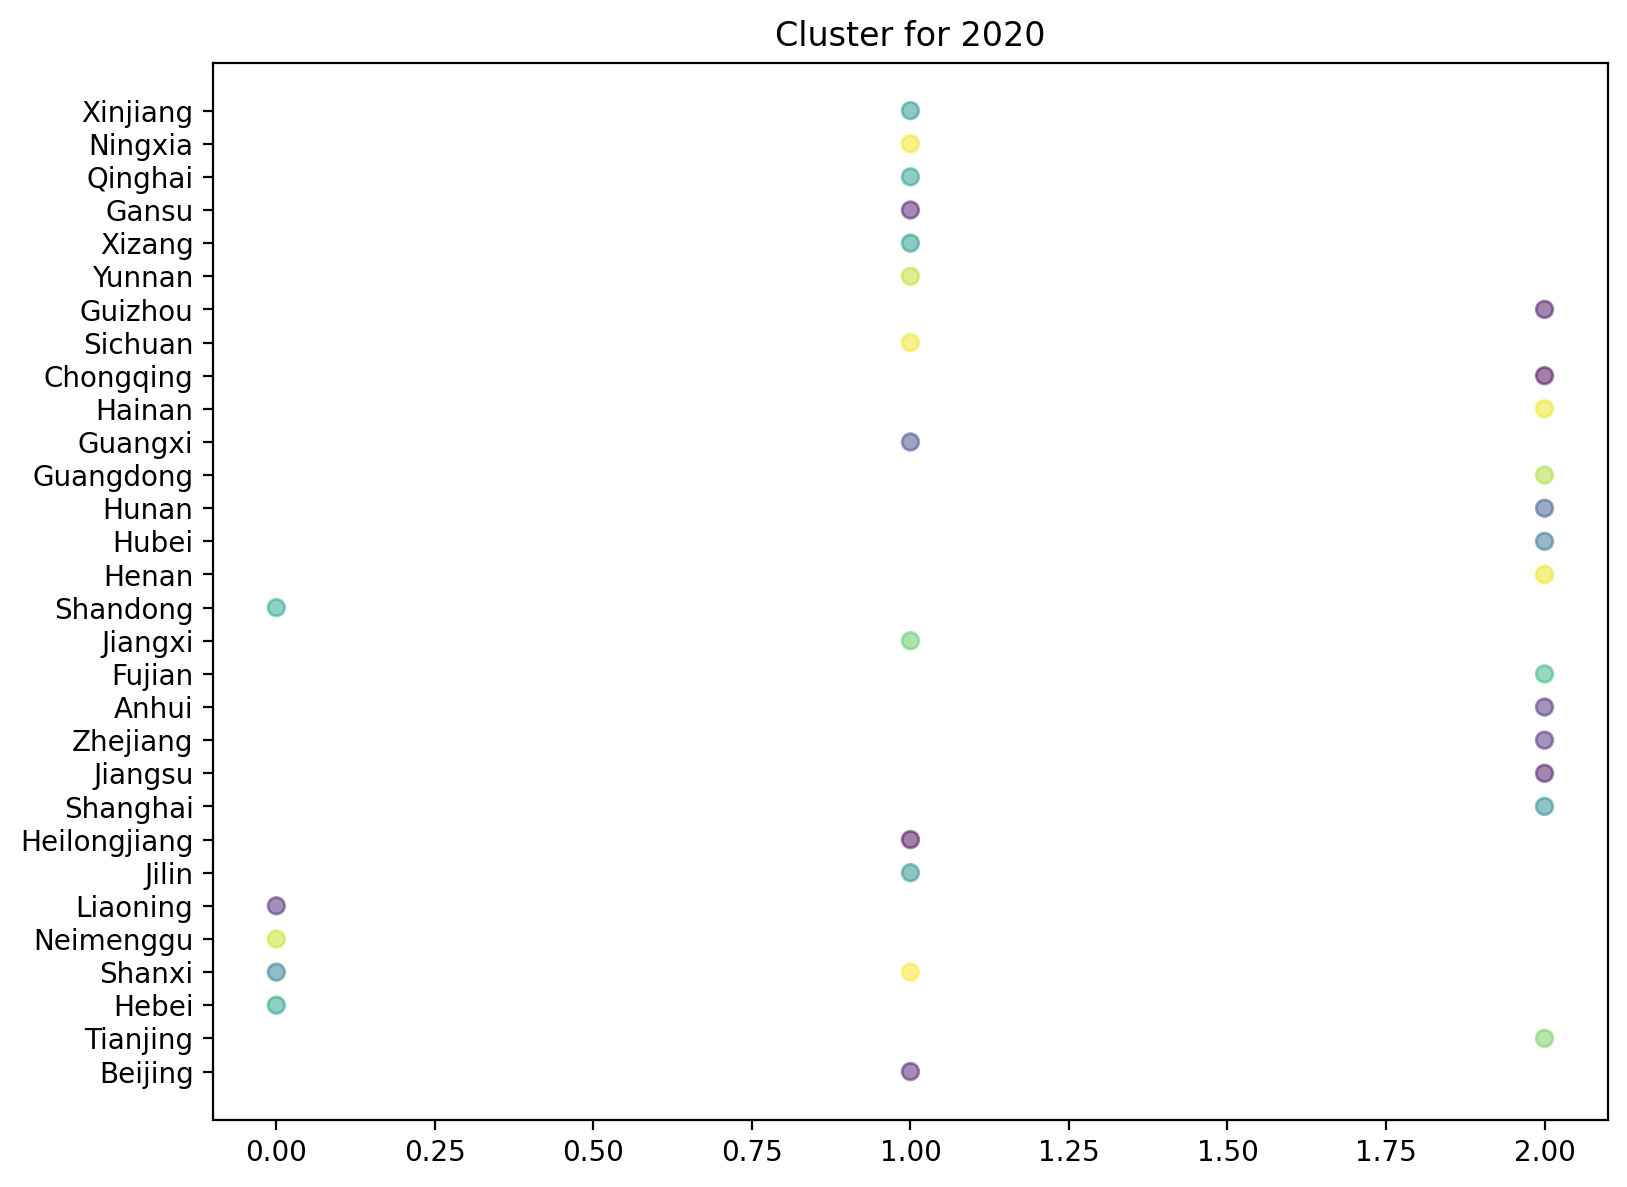

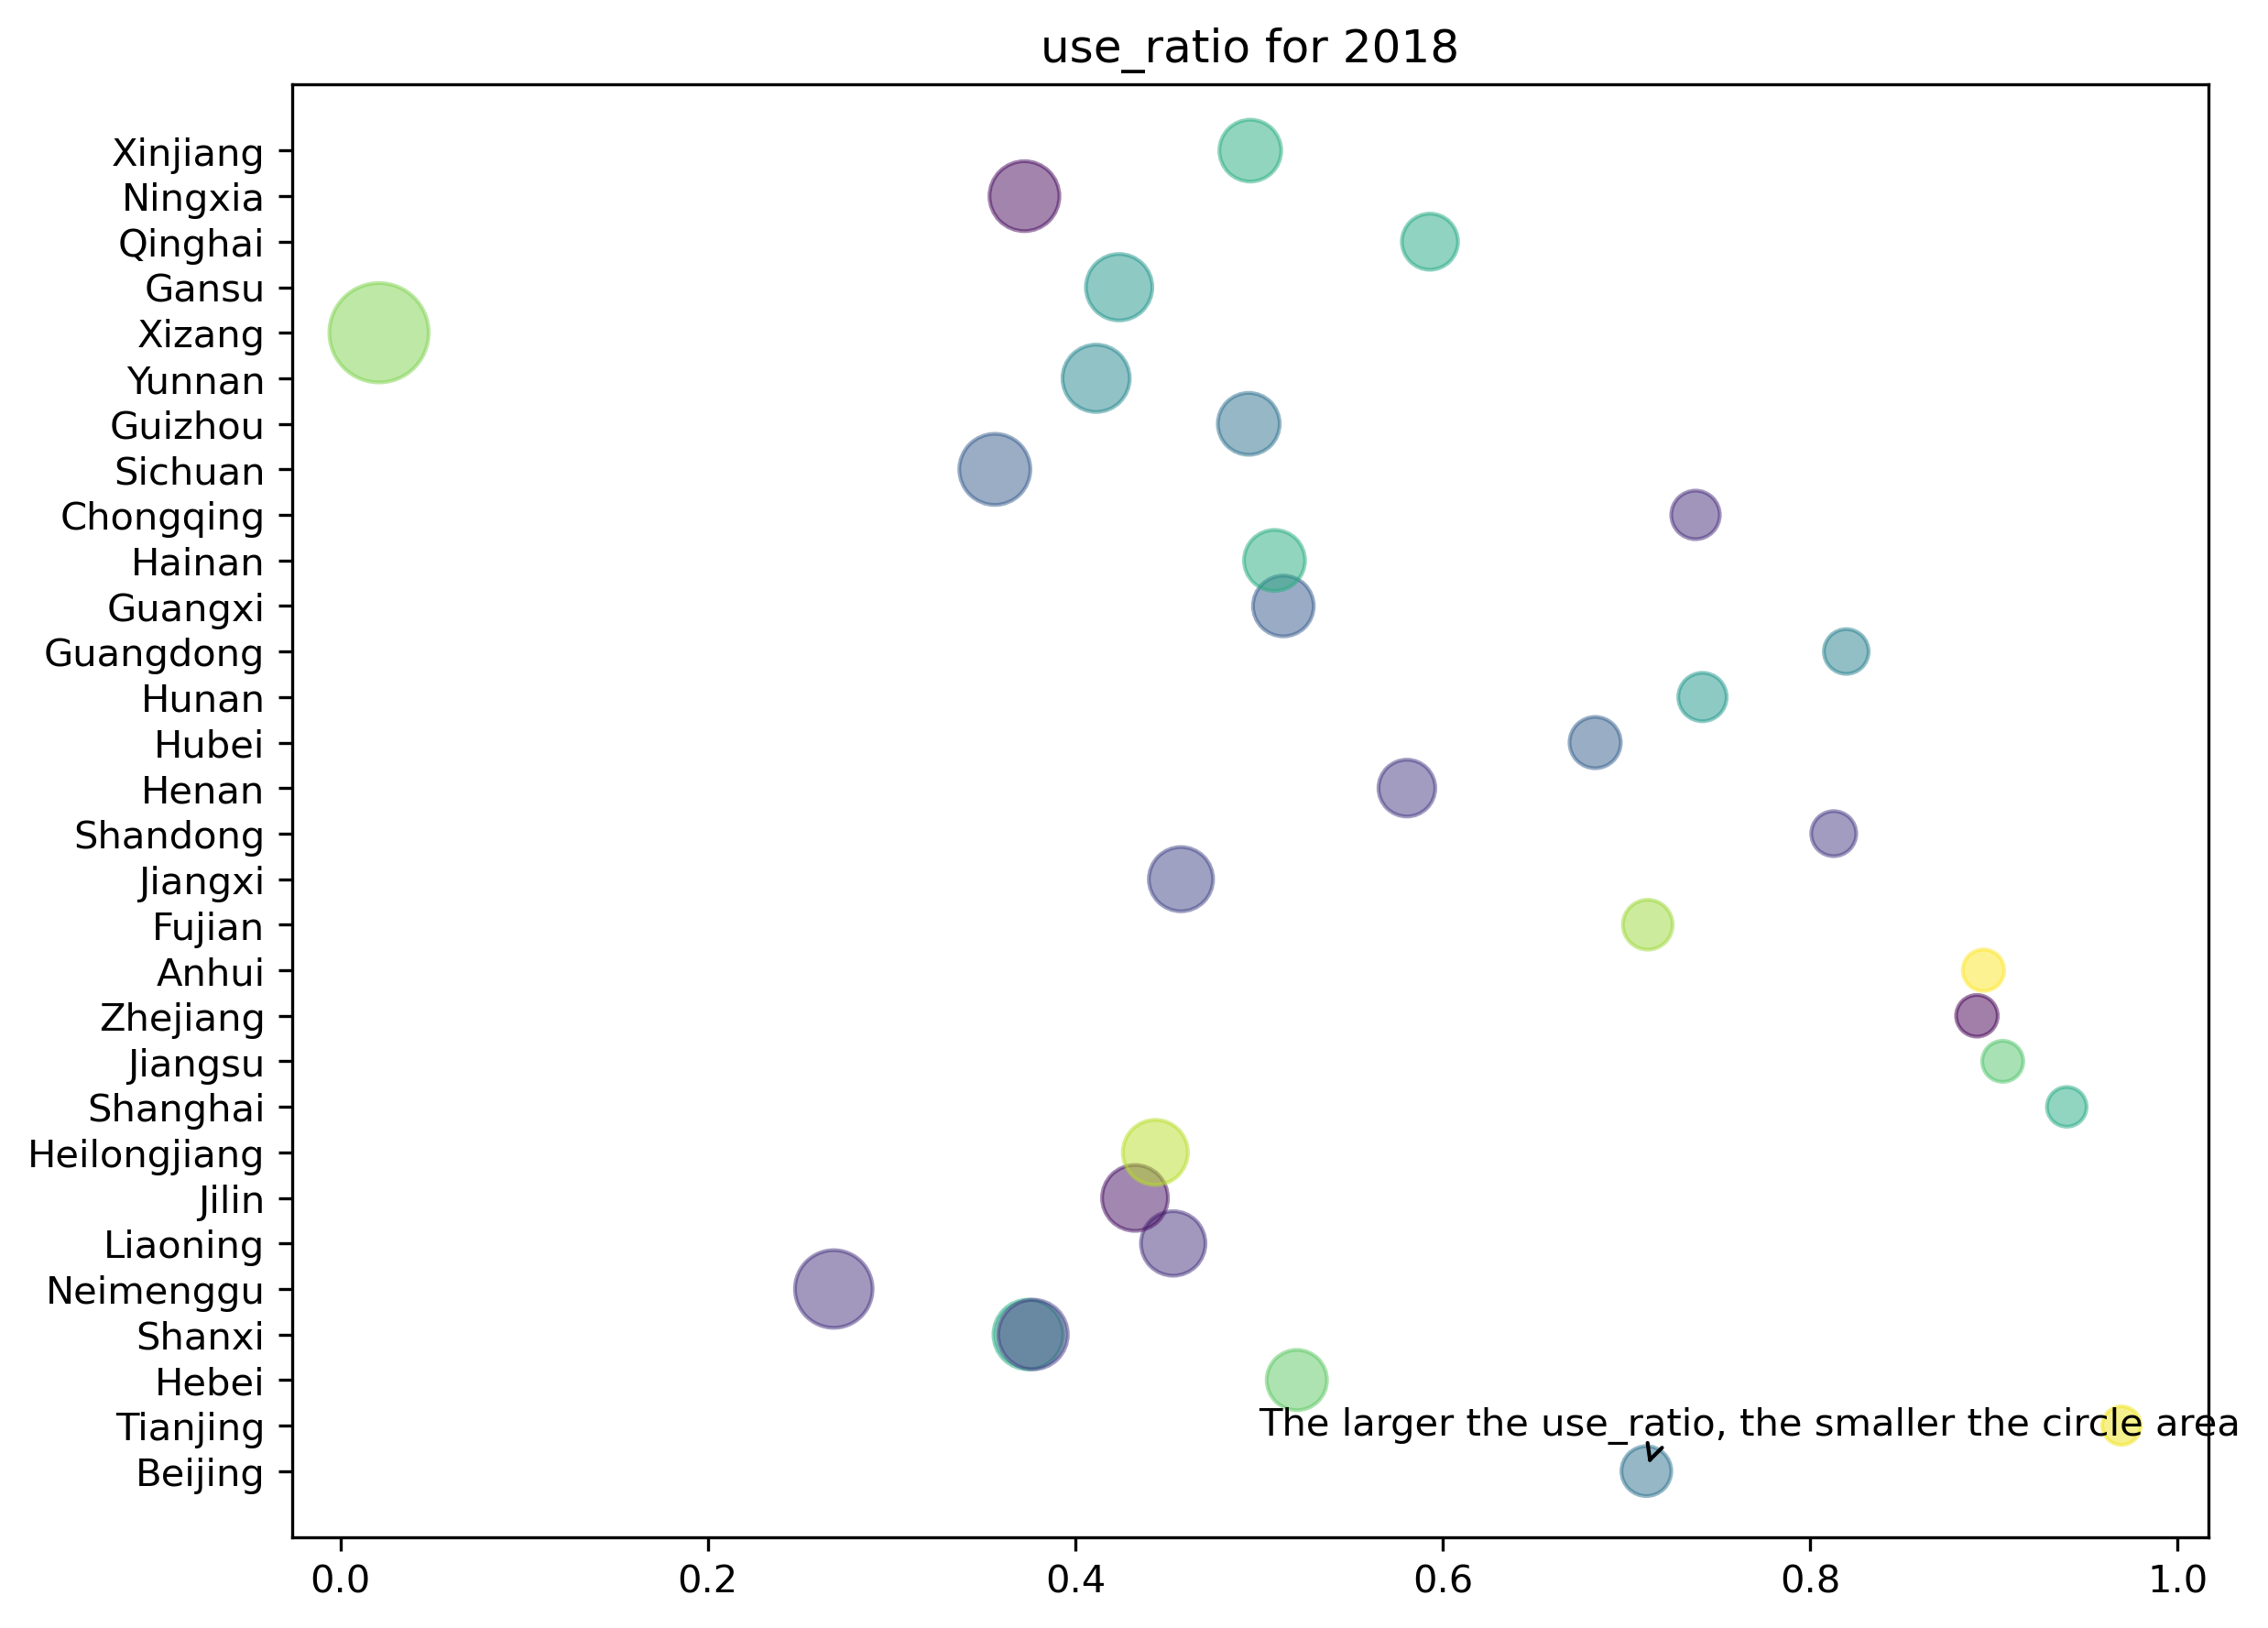

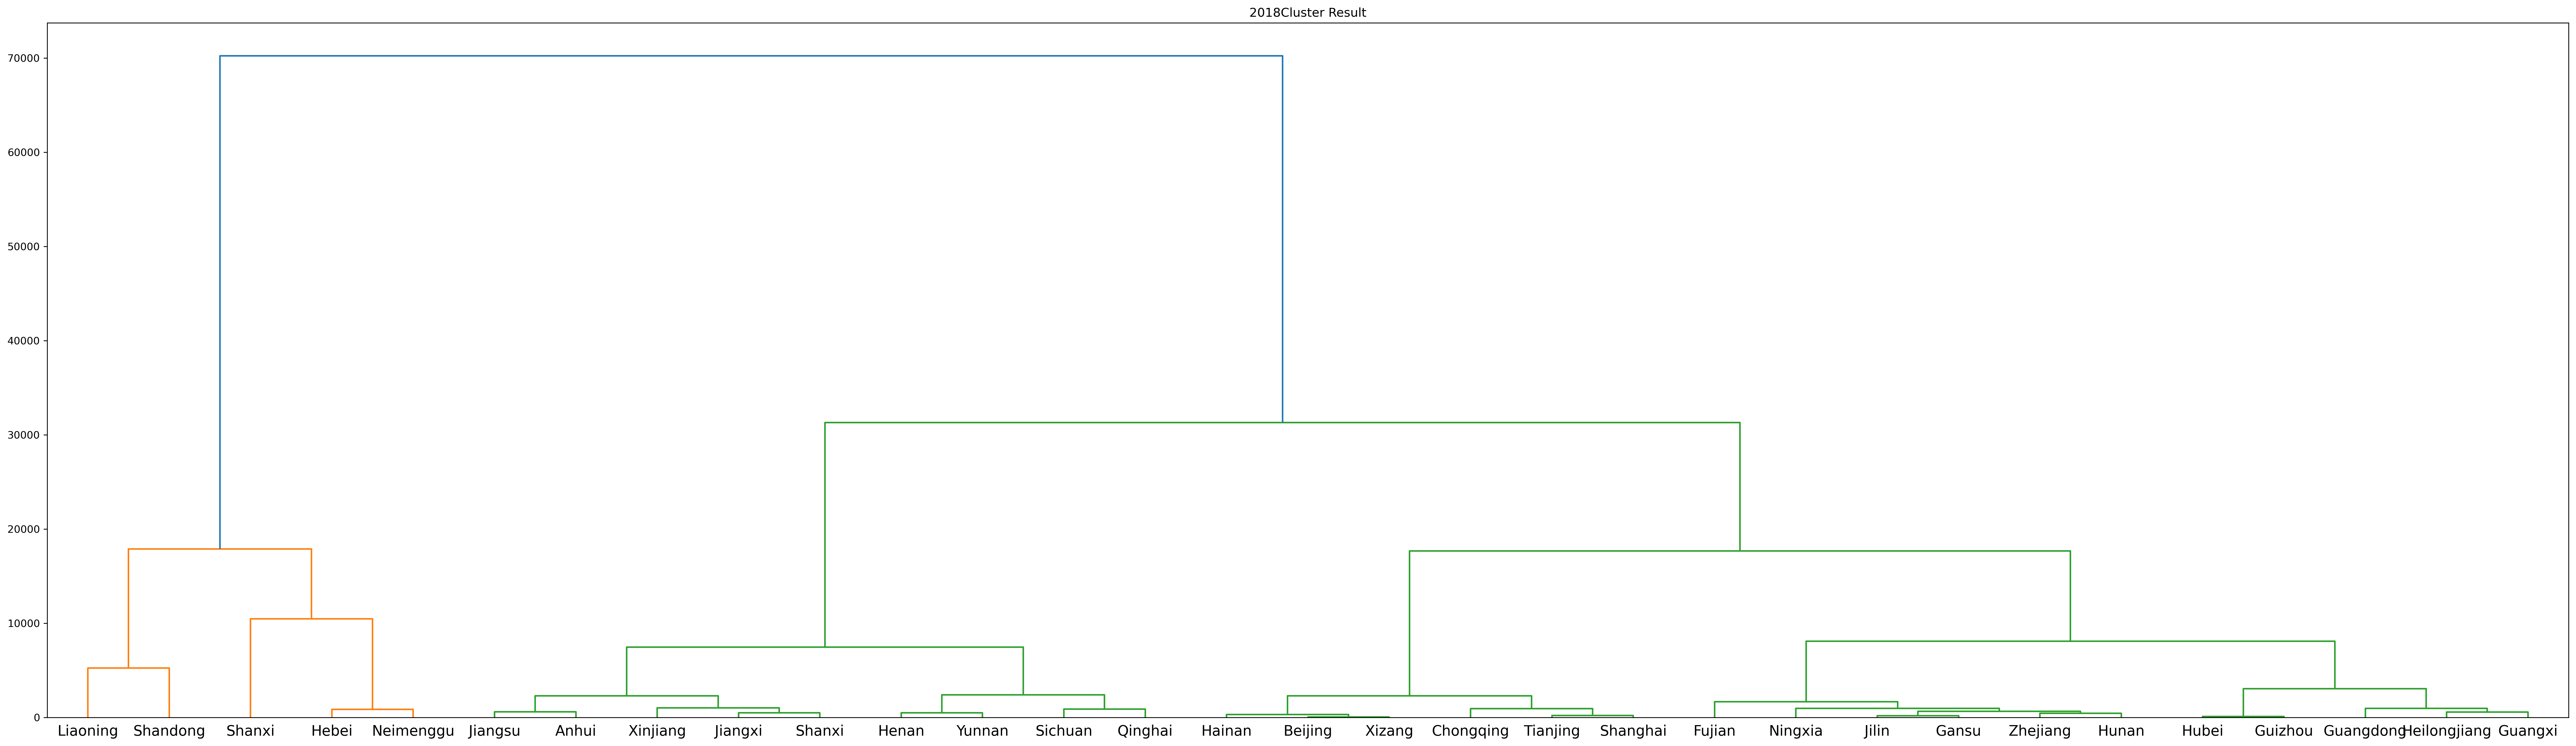

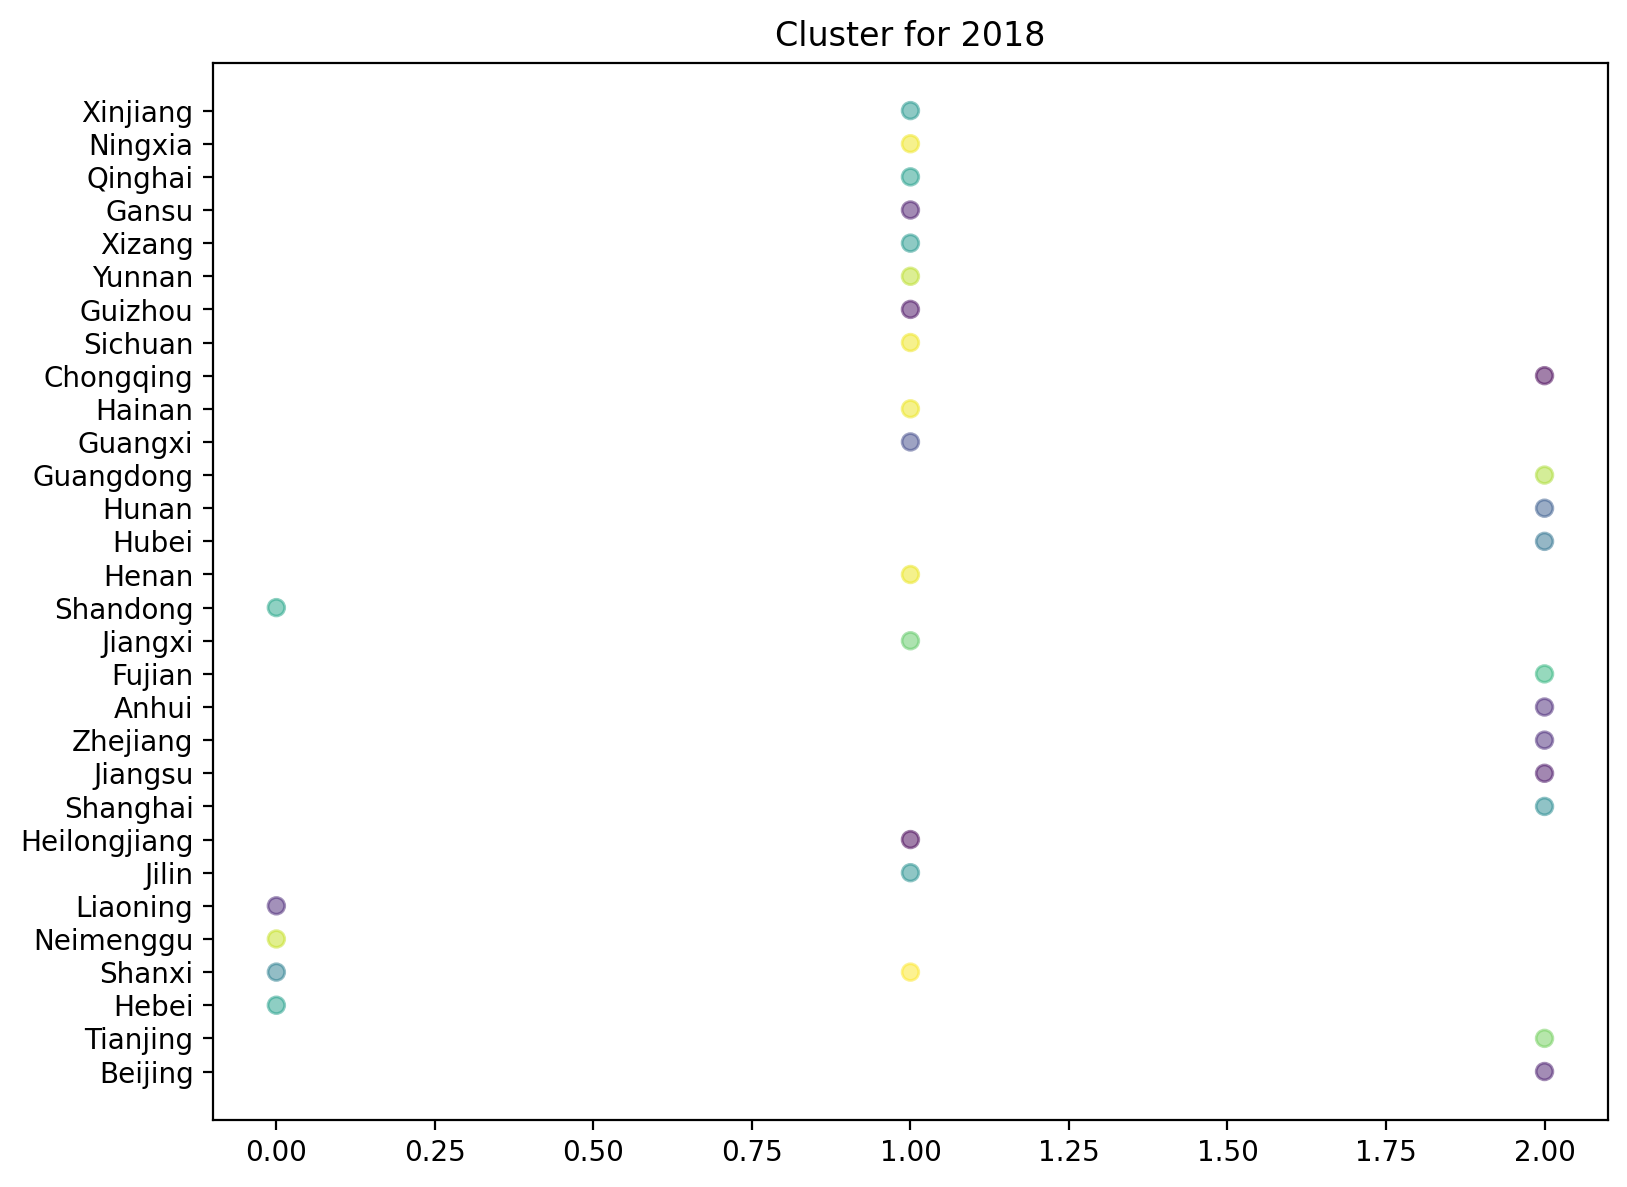

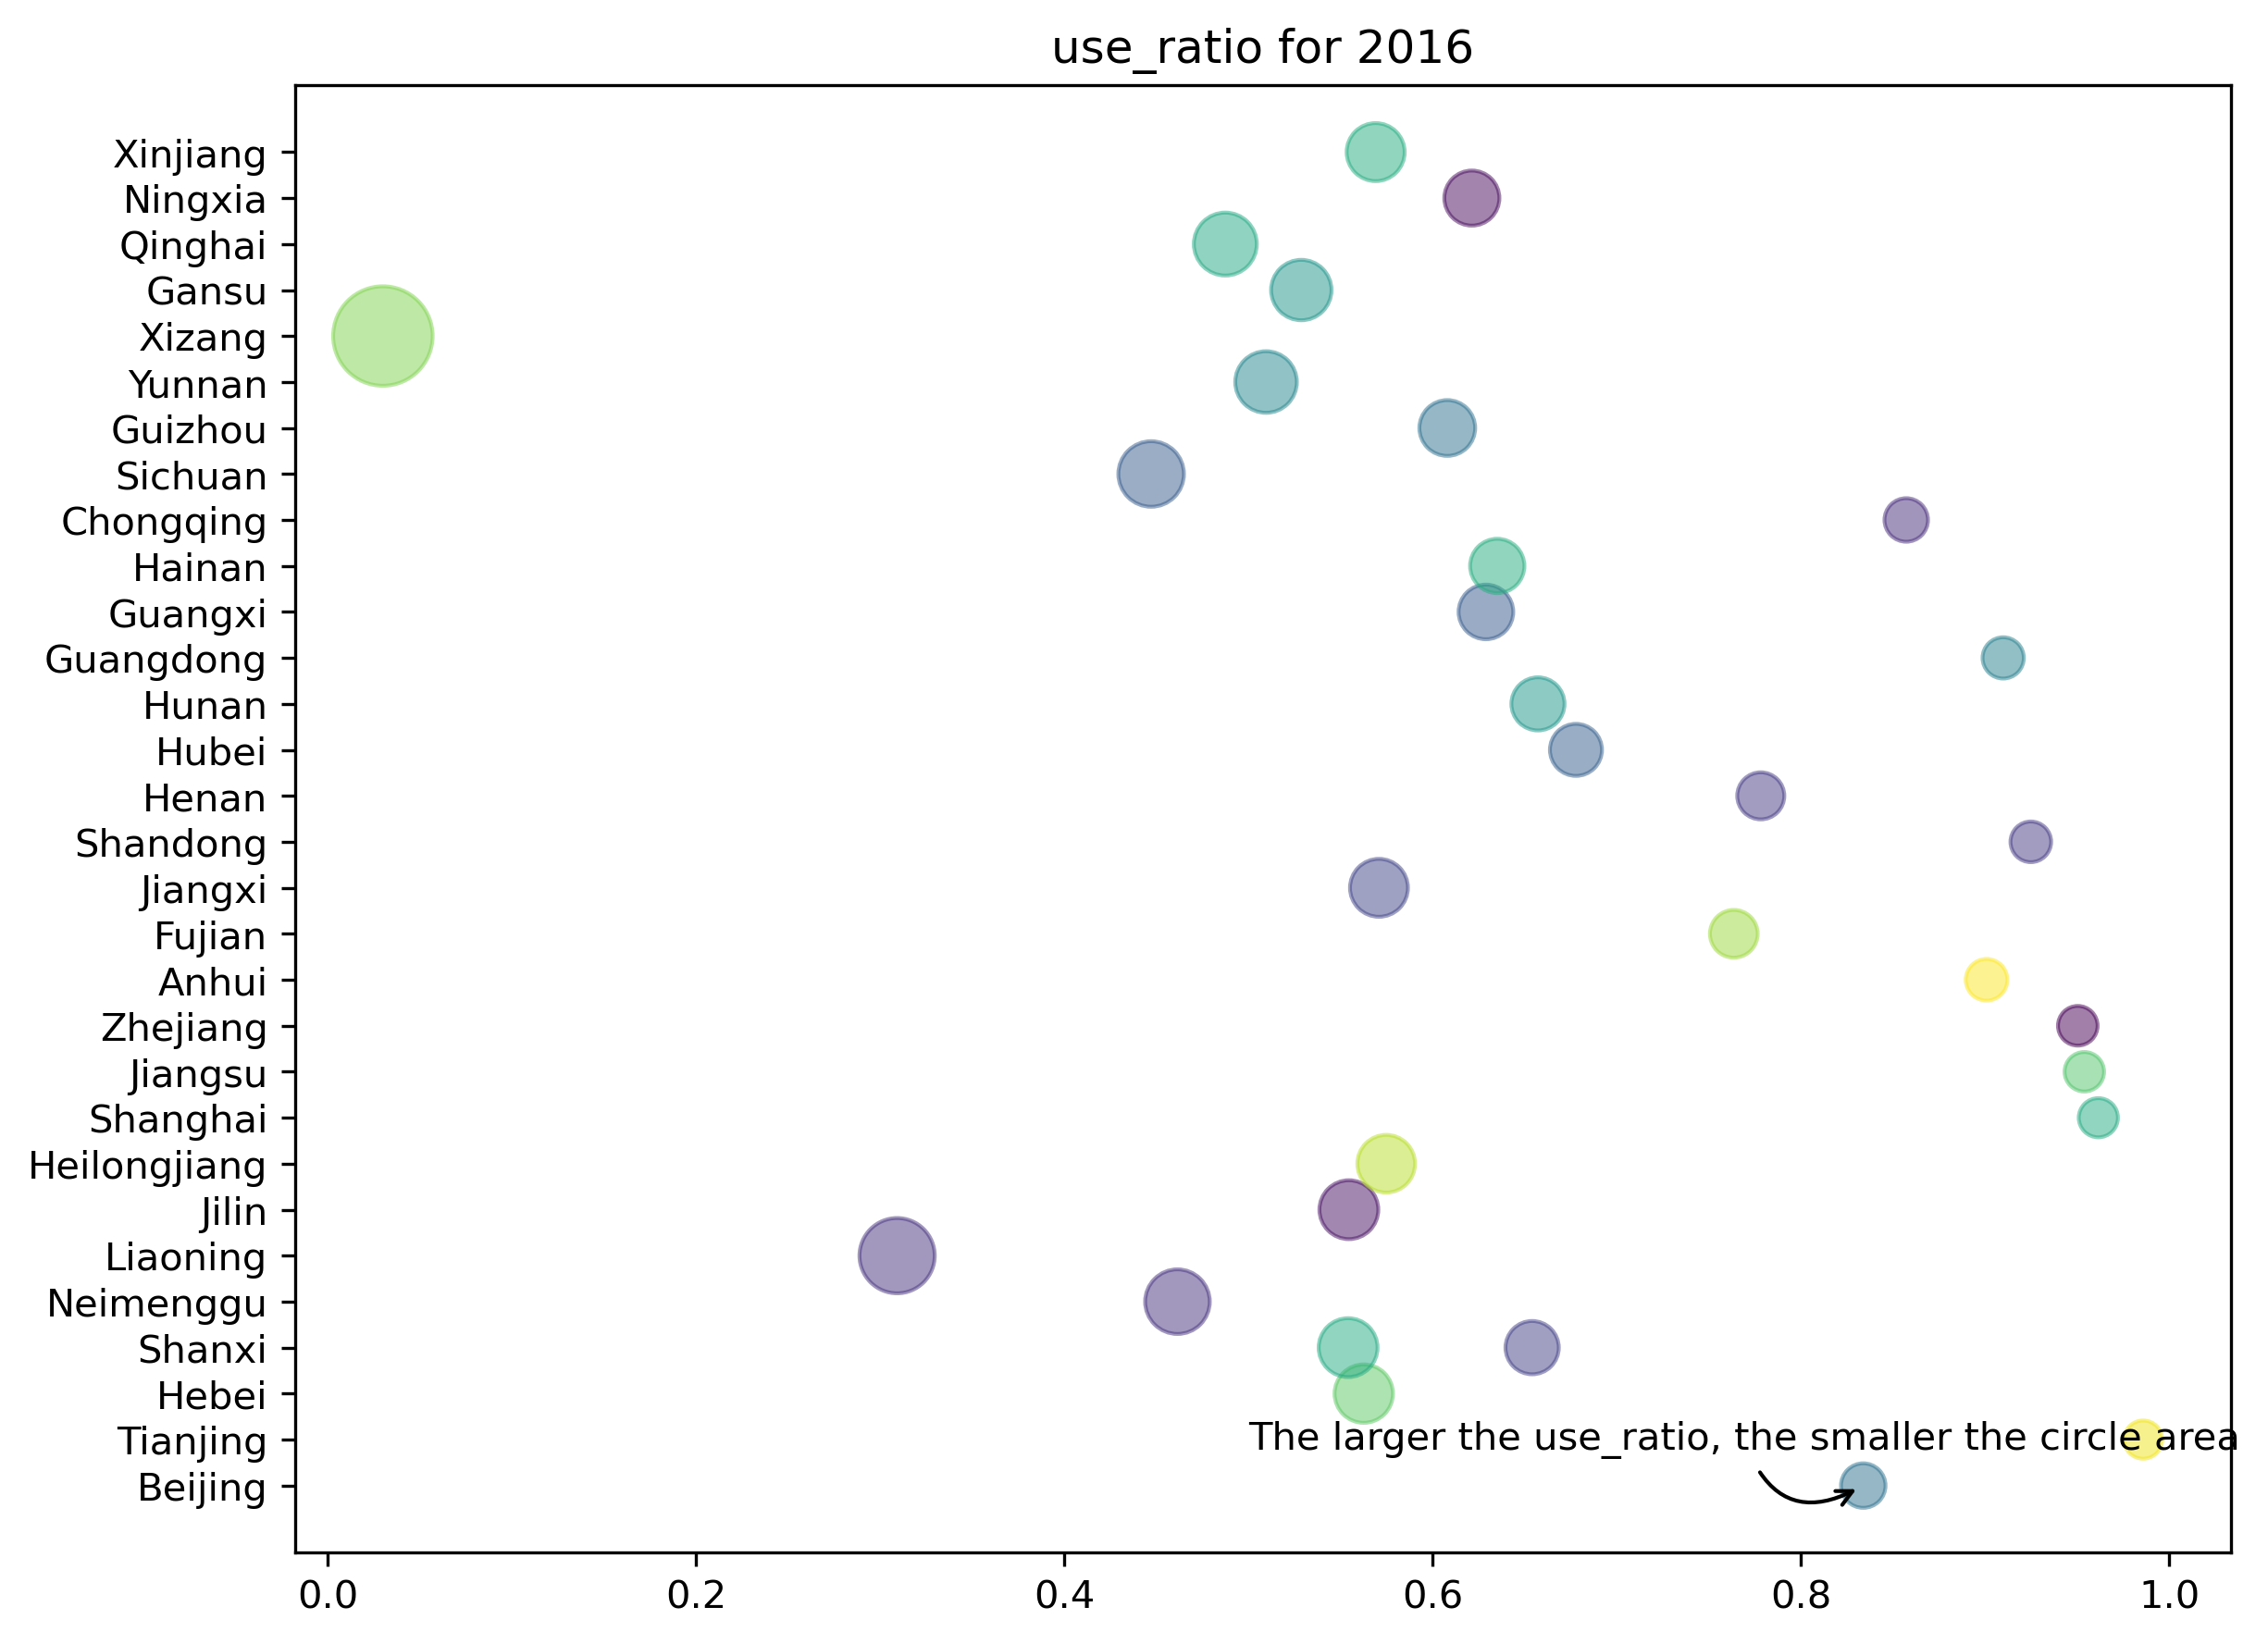

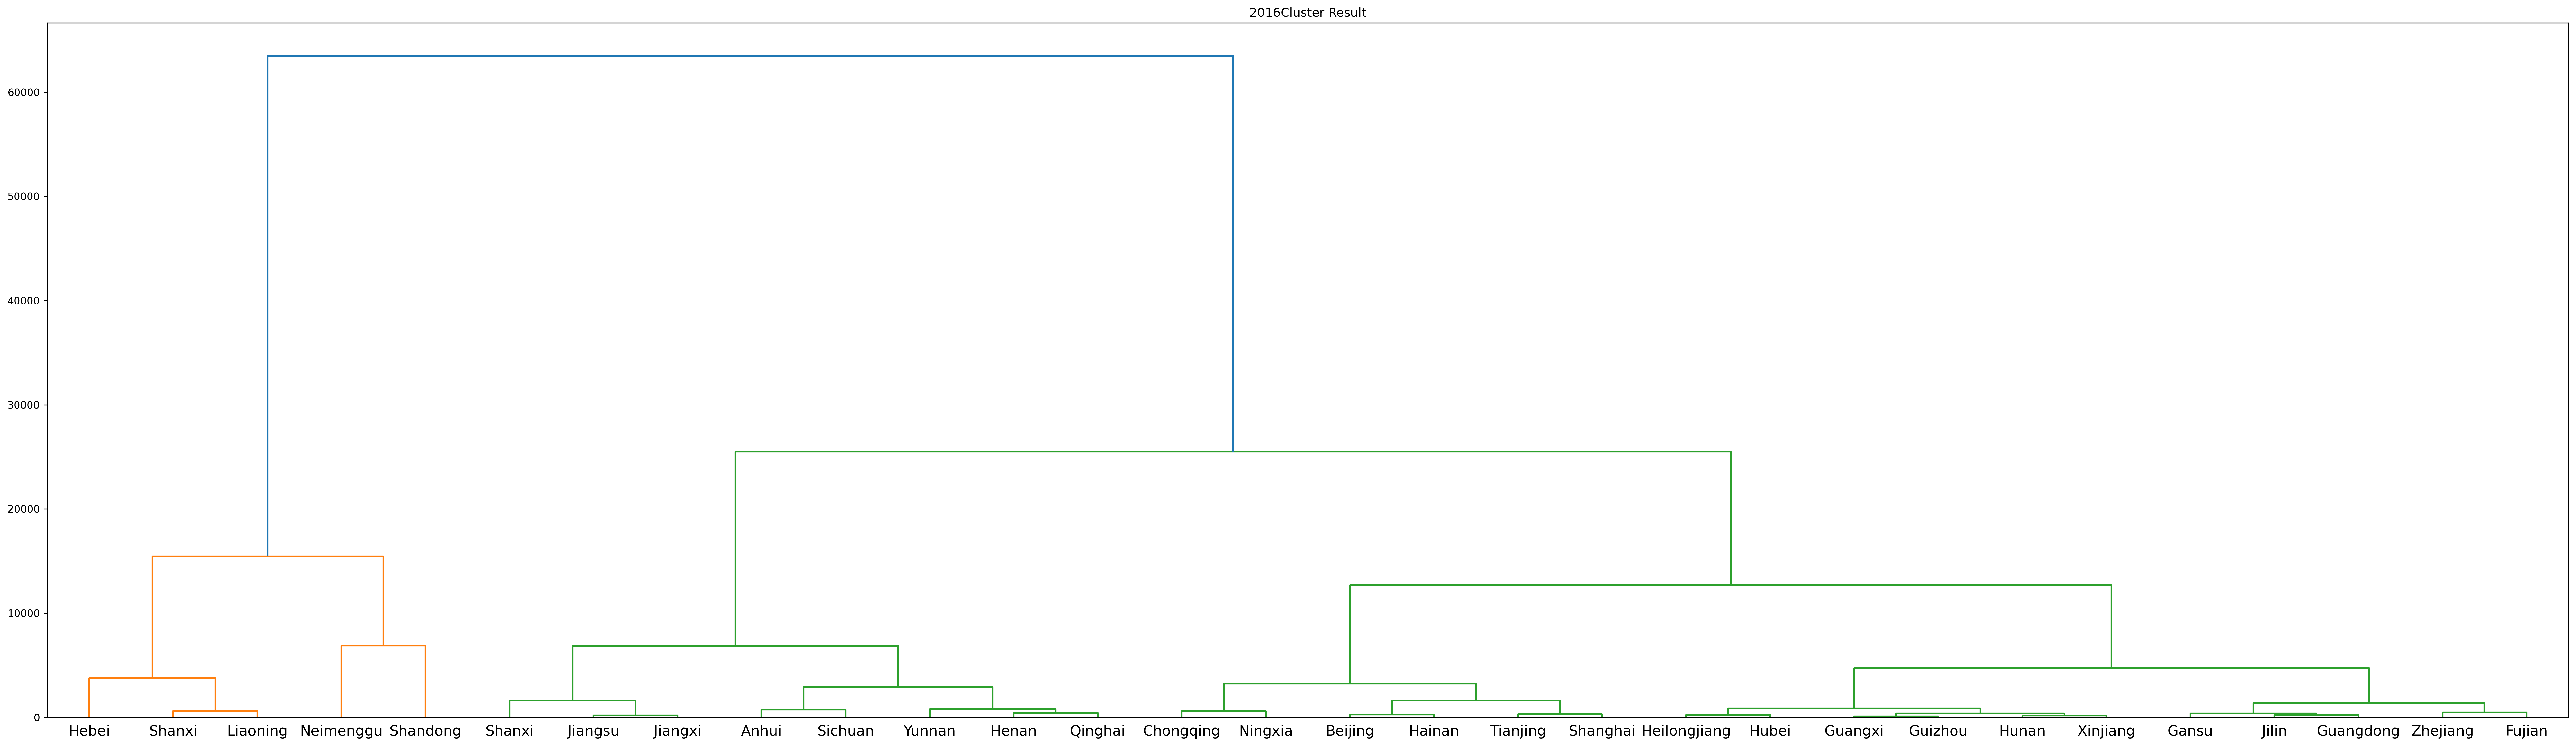

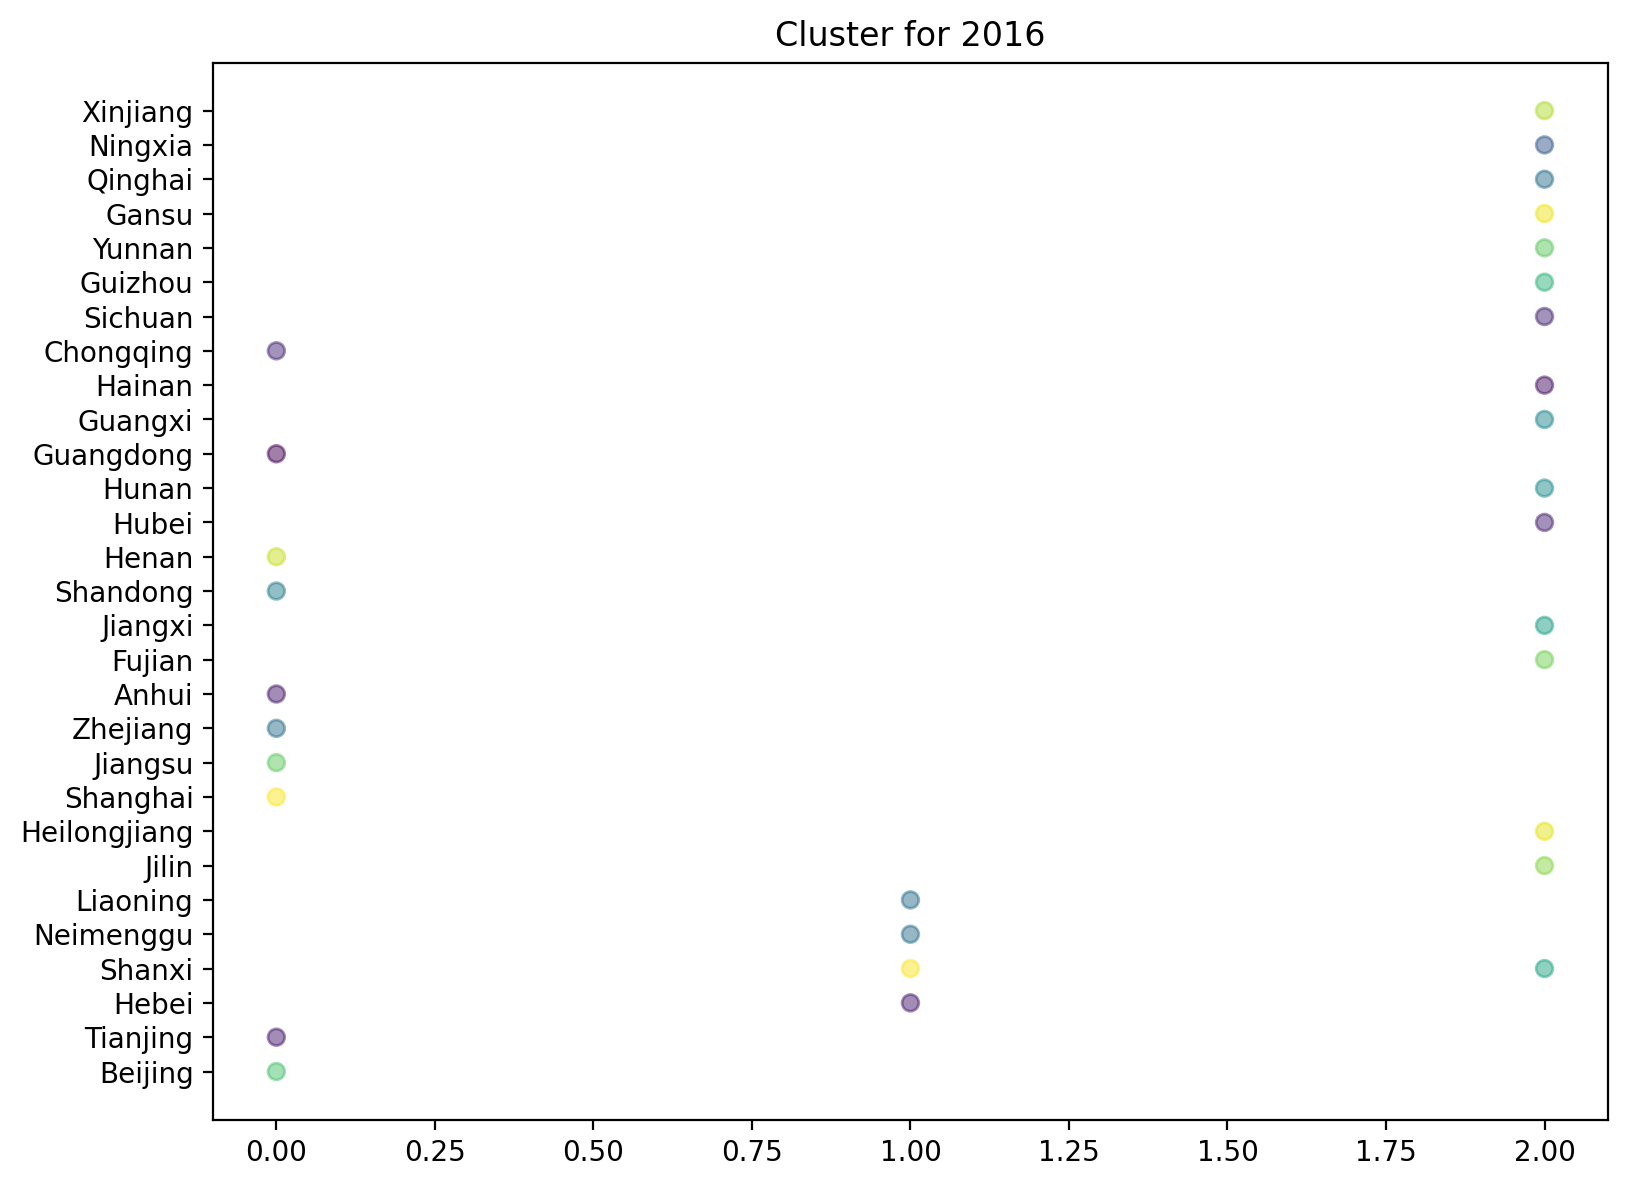

In [8]:
# Program entry point
if __name__ == "__main__":
    df = getData('datasets_sum.CSV')
    for i in df:
        showRatio(i,df[i])
        print(f"Conducting clustering analysis for the year{i}")
        showCluster(i,df[i])
        print(f"Clustering analysis for the year {i}concluded")
        
        

## Results display:
* Utilization rate (see directory for three-year images): After comprehensive analysis of three years' data, it was found that the utilization rate of general industrial solid waste varies greatly across China. The Jiangsu-Zhejiang region generally has a higher utilization rate, with most ranging from 40% to 70%.
* Regional clustering results (see directory for three-year images): After comprehensive analysis of three years' data, it was found that regions in China can roughly be grouped into three categories based on waste emission volume. Regions with higher emissions are concentrated in the north, such as Northeast China and Hebei, while cities with medium and lower emissions do not show a clear regional cluster distribution.